In [68]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [70]:
# list files in directory
!ls

moore.csv  sample_data


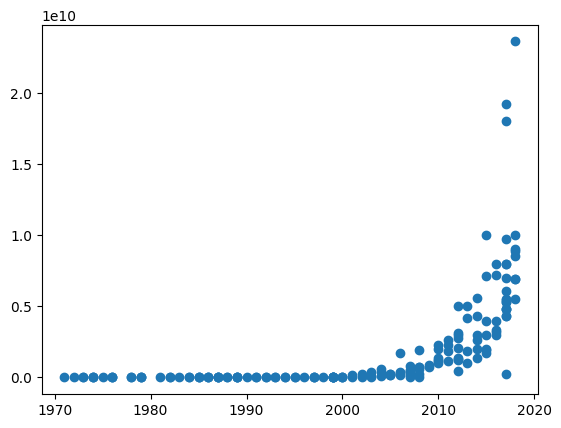

In [71]:
df = pd.read_csv('moore.csv', header=None).values
X = df[:, 0].reshape(-1, 1)
Y = df[:, 1].reshape(-1, 1)  # remember we want (N x D) tensors

plt.scatter(X, Y);

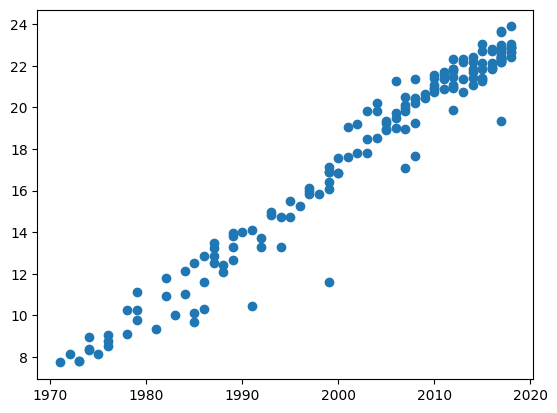

In [72]:
Y = np.log(Y)  # convert to linear: log C = (log r) * t + log C0
plt.scatter(X, Y);

In [73]:
# Scale and center both the X and Y axes
mx = np.mean(X)
sx = np.std(X)
my = np.mean(Y)
sy = np.std(Y)

Xn = (X - mx) / sx
Yn = (Y - my) / sy

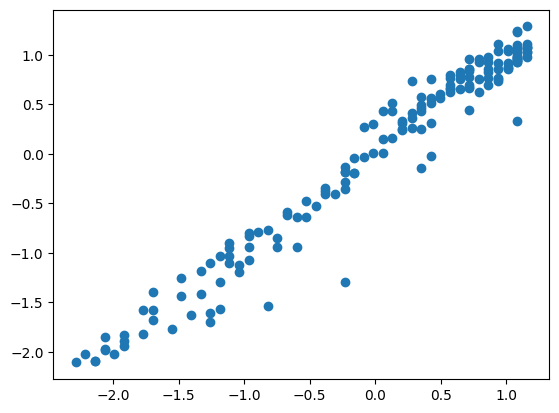

In [74]:
plt.scatter(Xn, Yn);

In [75]:
inputs = torch.from_numpy(Xn.astype(np.float32))
targets = torch.from_numpy(Yn.astype(np.float32))
type(inputs)

torch.Tensor

epoch 1/100	loss: 3.9776
epoch 2/100	loss: 3.8216
epoch 3/100	loss: 3.5666
epoch 4/100	loss: 3.2572
epoch 5/100	loss: 2.9259
epoch 6/100	loss: 2.5948
epoch 7/100	loss: 2.2783
epoch 8/100	loss: 1.9848
epoch 9/100	loss: 1.7185
epoch 10/100	loss: 1.4808
epoch 11/100	loss: 1.2713
epoch 12/100	loss: 1.0884
epoch 13/100	loss: 0.9300
epoch 14/100	loss: 0.7936
epoch 15/100	loss: 0.6768
epoch 16/100	loss: 0.5772
epoch 17/100	loss: 0.4925
epoch 18/100	loss: 0.4206
epoch 19/100	loss: 0.3599
epoch 20/100	loss: 0.3085
epoch 21/100	loss: 0.2653
epoch 22/100	loss: 0.2288
epoch 23/100	loss: 0.1981
epoch 24/100	loss: 0.1724
epoch 25/100	loss: 0.1507
epoch 26/100	loss: 0.1325
epoch 27/100	loss: 0.1173
epoch 28/100	loss: 0.1045
epoch 29/100	loss: 0.0938
epoch 30/100	loss: 0.0848
epoch 31/100	loss: 0.0773
epoch 32/100	loss: 0.0710
epoch 33/100	loss: 0.0657
epoch 34/100	loss: 0.0612
epoch 35/100	loss: 0.0575
epoch 36/100	loss: 0.0544
epoch 37/100	loss: 0.0518
epoch 38/100	loss: 0.0497
epoch 39/100	loss: 0.

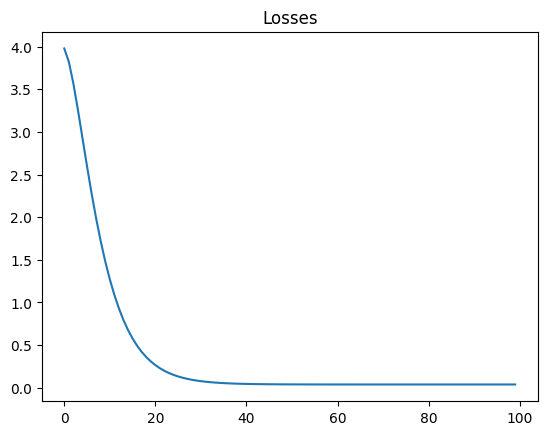

In [76]:
# define the model
model = nn.Linear(1, 1)

# loss and optimization
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

# train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
    # initialize gradient params to zero
    optimizer.zero_grad()
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # save loss for plot
    losses.append(loss.item())
    # backpropagation and optimization
    loss.backward()
    optimizer.step()
    # print result
    print(f'epoch {it+1}/{n_epochs}\tloss: {loss.item():.4f}')

plt.plot(losses)
plt.title('Losses');

In [77]:
# recover the output in numpy array format
predictions = model(inputs).detach().numpy()

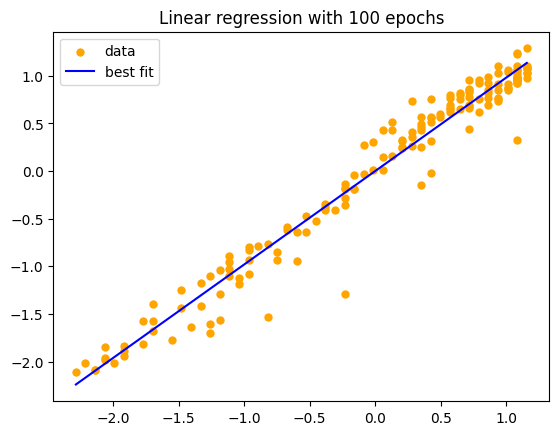

In [78]:
plt.scatter(Xn, Yn, c='orange', linewidths=0.0, label='data')
plt.plot(Xn, predictions, 'b-', label='best fit')
plt.legend()
plt.title(f'Linear regression with {n_epochs} epochs');

In [89]:
# recover weight and bias
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(f'w = {w[0, 0]:.3f}\nb = {b[0]:.8f}')  # bias should be zero as our data is standardized

w = 0.980
b = -0.00010160


In [90]:
# the weight and bias found are for the normalized X, Y
# we need to scale w to fit the original data
# a = w * std(Y) / std(X)
m = w * sy / sx
print(m[0, 0])

0.3415519821971414


In [99]:
# now we need to go back to the exponential model
# r = e^m
# C0 = e^b
r = np.exp(m[0, 0])
logC0 = my + b[0]*sy - w[0, 0]*mx*sy/sx
c0 = np.exp(logC0)
print(f'r = {r:.3f}\tc0 = {c0:.3e}')

r = 1.407	c0 = 5.257e-290


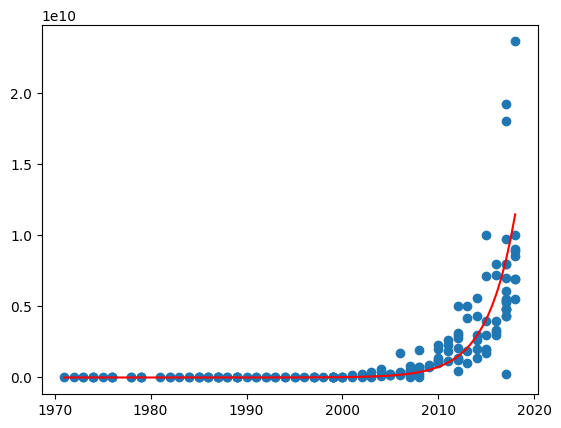

In [98]:
# plot the results in exponential form
Ye = np.exp(Y)
Xnew = np.linspace(1971, 2018, 100)
Ynew = c0 * r**(Xnew)
plt.scatter(X, Ye, label='original data, exp')
plt.plot(Xnew, Ynew, 'r-');

In [102]:
t_double = np.log(2)/ np.log(r)
print(f'Time to double in years: {t_double:.3f}')

Time to double in years: 2.029
